## Gradient Descent

**Gradient Descent (GD)** is an **optimization algorithm** used to minimize the **cost/loss function** of a model by iteratively updating its parameters in the direction that reduces error the most — the **negative gradient**.  
It’s the backbone of most machine learning algorithms, from linear regression to deep neural networks.

---

### 🧮 Formula (Gradient Descent)

**Vector (compact) form**
$$
\theta^{(t+1)} \;=\; \theta^{(t)} \;-\; \alpha \,\nabla_\theta J\!\big(\theta^{(t)}\big)
$$

**Component-wise updates**
For each weight \(w_j\) and bias \(b\):
$$
w_j \leftarrow w_j - \alpha \,\frac{\partial J}{\partial w_j},
\qquad
b \leftarrow b - \alpha \,\frac{\partial J}{\partial b}
$$

**When the model is linear regression with MSE**
Predictions: \(\hat y^{(i)} = \mathbf{w}^\top \mathbf{x}^{(i)} + b\)

Loss:
$$
J(\theta) \;=\; \frac{1}{m}\sum_{i=1}^{m} \frac{1}{2}\,\big(\hat y^{(i)} - y^{(i)}\big)^2
$$

Gradients:
$$
\frac{\partial J}{\partial \mathbf{w}} 
= \frac{1}{m}\,X^\top (X\mathbf{w} + b\mathbf{1} - \mathbf{y}),
\qquad
\frac{\partial J}{\partial b} 
= \frac{1}{m}\,\mathbf{1}^\top (X\mathbf{w} + b\mathbf{1} - \mathbf{y})
$$

---


### 🧩 Types of Gradient Descent

#### 1. **Batch Gradient Descent (BGD)**
- Uses **all training examples** to compute the gradient before each update.  
- Updates parameters **once per epoch**.  

**Pros:**  
- Smooth, stable convergence.  
- Suitable for small datasets.  

**Cons:**  
- Computationally expensive for large datasets.  
- May get stuck in local minima for non-convex functions.

---

#### 2. **Stochastic Gradient Descent (SGD)**
- Uses **one random sample** to compute and update parameters per iteration.  
- Updates are **very frequent**, leading to faster but noisier learning.  

**Pros:**  
- Can escape local minima due to randomness.  
- Good for large and streaming datasets.  

**Cons:**  
- High variance in updates.  
- Convergence can oscillate around the minimum.

---

#### 3. **Mini-Batch Gradient Descent**
- A middle ground between Batch and SGD.  
- Uses a **small subset (batch)** of the data to compute the gradient.  

**Pros:**  
- Efficient and stable.  
- Leverages vectorization (GPU-friendly).  
- Commonly used in deep learning.  

**Cons:**  
- Needs tuning of batch size.  
- Still may not reach the exact global minimum.

---

### 🧠 Learning Behavior

Gradient Descent **learns through iteration** — adjusting parameters bit by bit after each gradient calculation.  
The **learning rate (α)** acts like the model’s curiosity:  
- Too curious (high α) → it jumps around and misses the minimum.  
- Too cautious (low α) → it crawls, taking forever to reach the goal.  

The model “learns” best when α is tuned so each step **reduces loss consistently without overshooting**.  
Over time, these updates transform random initial weights into parameters that **minimize prediction error** — that’s the essence of learning in most ML models.

---

### Advantages
- Works for differentiable, complex cost functions.  
- Scales to large datasets (with mini-batch or SGD).  
- Adaptable — forms the basis for **Adam**, **RMSProp**, **Adagrad**, etc.

---

### Disadvantages
- Sensitive to **learning rate (α)** — too high can diverge, too low can stagnate.  
- May get stuck in **local minima** (especially with non-convex surfaces).  
- Requires **feature scaling** for faster convergence.  
- Can be computationally expensive if improperly tuned.

---

### Points to Remember
- Always **normalize or standardize features** before using GD.  
- Use **learning rate scheduling** or adaptive optimizers for better results.  
- Plot **loss vs. epochs** to monitor convergence.  
- Try different **batch sizes** to balance speed and stability.  
- GD doesn’t guarantee the global minimum — but often gets close enough.

---


## 1. Gradient Descent (Step by step)

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # for OLS not gradient descent

In [3]:
X,y = make_regression(n_samples=4, n_features=1, n_informative=1, n_targets=1,noise=80,random_state=13)

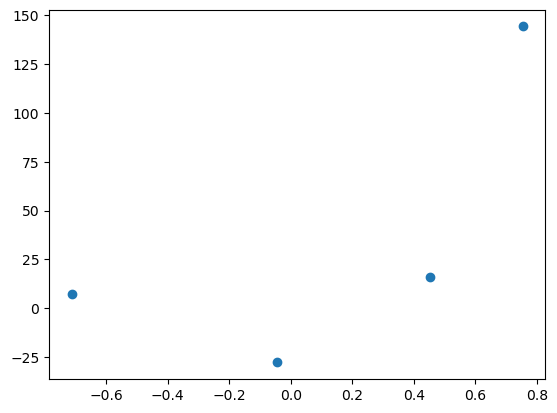

In [4]:
plt.scatter(X,y)

In [5]:
reg = LinearRegression()
reg.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
reg.coef_, reg.intercept_

(array([78.35063668]), np.float64(26.15963284313262))

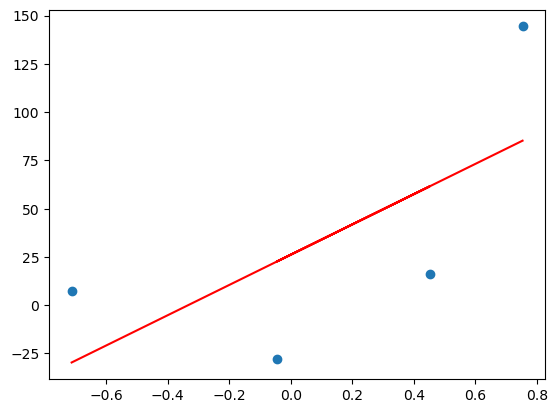

In [7]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [8]:
# Lets apply Gradient Descent assuming slope is constant m = 78.35 and let's assume the starting value for intercept b = 0
y_pred = ((78.35 * X) + 100).reshape(4)

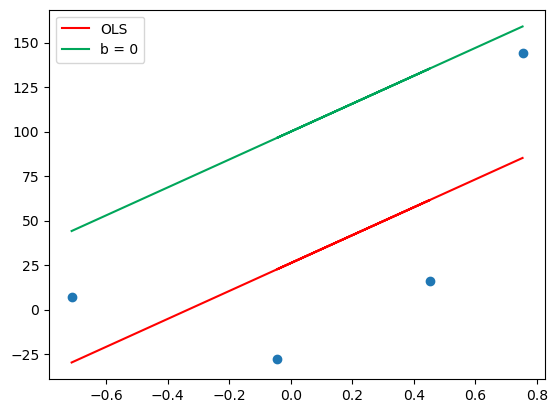

In [9]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [34]:
m = 78.35 
b = 100

loss_slope = -2 * np.sum(y - m*X.ravel() - b)
#The np.ravel() function in NumPy returns a contiguous flattened array. 
#It converts a multi-dimensional array into a 1-D array containing all the elements of the input array.
loss_slope

np.float64(21049.119491445497)

In [12]:
# Lets take learning rate = 0.1
lr = 0.1

step_size = loss_slope*lr
step_size

np.float64(59.072236591790784)

In [13]:
# Calculating the new intercept
b = b - step_size
b

np.float64(40.927763408209216)

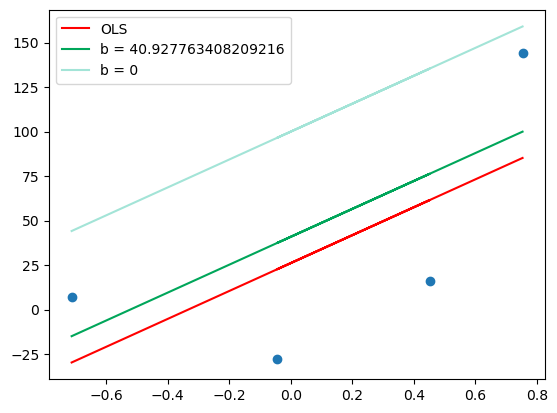

In [14]:
y_pred1 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [15]:
# Iteration 2
loss_slope = -2 * np.sum(y - m*X.ravel() - b)
loss_slope

np.float64(118.14447318358157)

In [16]:
step_size = loss_slope*lr
step_size

np.float64(11.814447318358157)

In [17]:
b = b - step_size
b

np.float64(29.11331608985106)

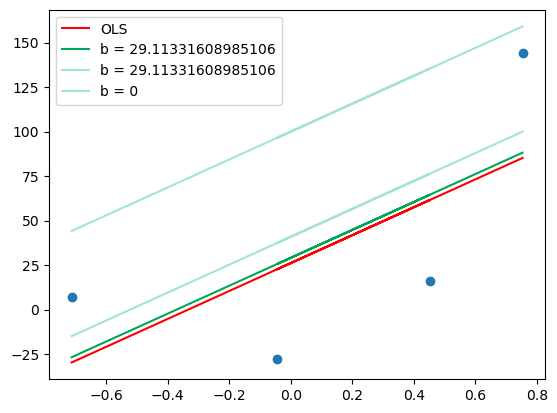

In [18]:
y_pred2 = ((78.35 * X) + b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [19]:
step_size = loss_slope*lr
step_size

np.float64(11.814447318358157)

In [20]:
b = b - step_size
b

np.float64(17.298868771492906)

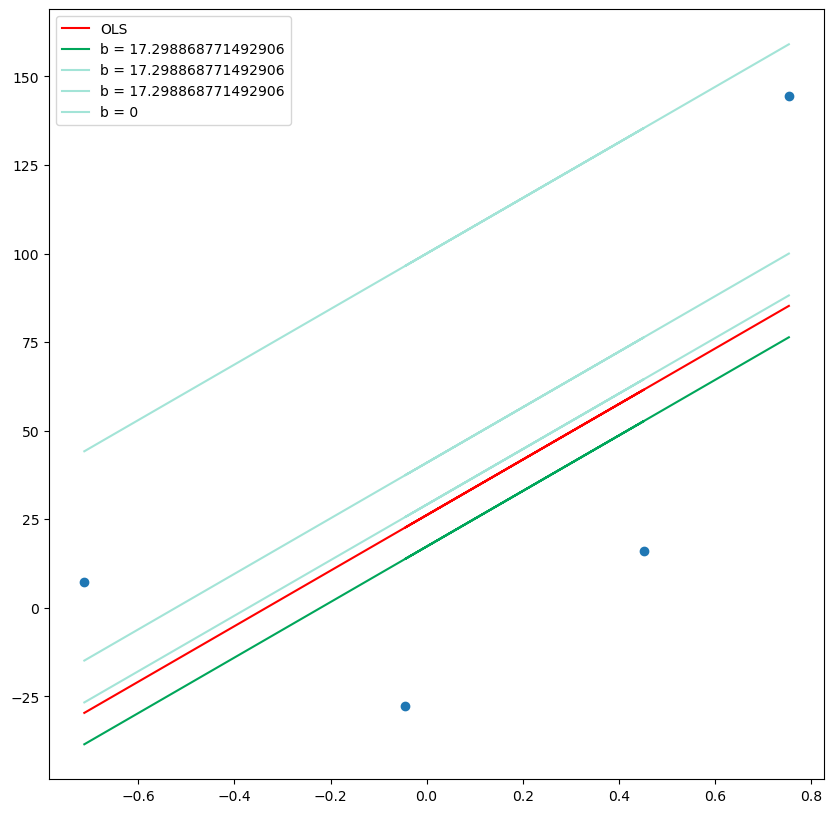

In [22]:
y_pred3 = ((78.35 * X) + b).reshape(4)

plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='OLS')
plt.plot(X,y_pred3,color='#00a65a',label='b = {}'.format(b))
plt.plot(X,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred1,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(X,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

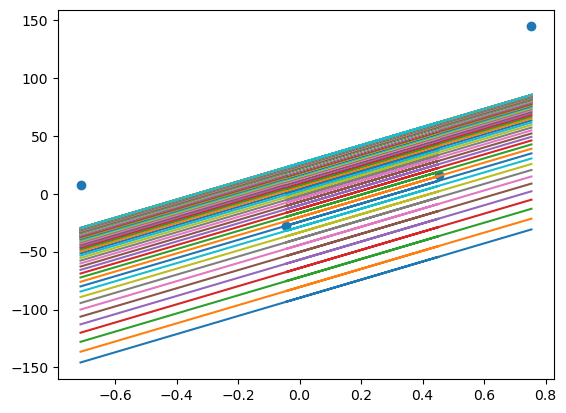

In [23]:
b = -100
m = 78.35
lr = 0.01

epochs = 100

for i in range(epochs):
  loss_slope = -2 * np.sum(y - m*X.ravel() - b)
  b = b - (lr * loss_slope)

  y_pred = m * X + b

  plt.plot(X,y_pred)

plt.scatter(X,y)

## 2. Gradient Descent from scratch

In [24]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [25]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

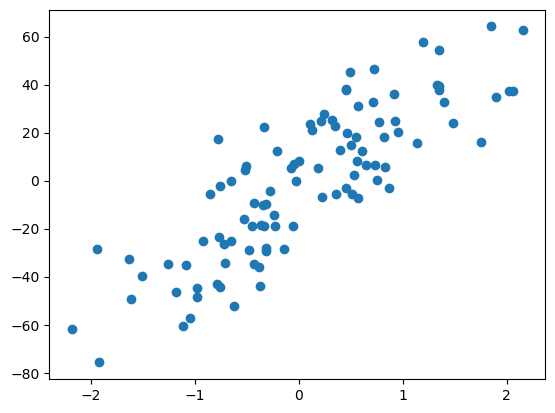

In [26]:
plt.scatter(X,y)

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [29]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [30]:
class GDRegressor:
    
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        # calcualte the b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    

In [31]:
gd = GDRegressor(0.001,50)

In [32]:
gd.fit(X_train,y_train)

28.159367347119066 -2.3004574196824854


In [33]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6343842836315579

## 3. Gradient descent both slope(m) and intercept(b)

In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# %matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [2]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

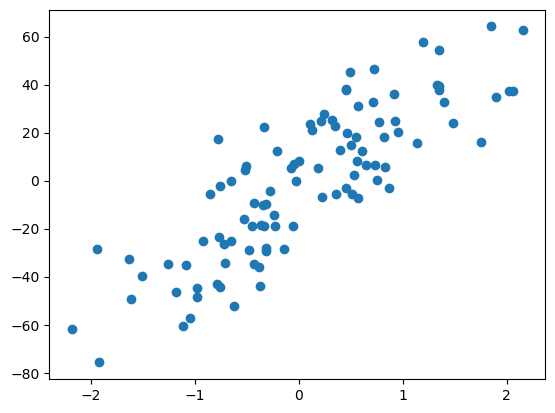

In [3]:
plt.scatter(X,y)

In [4]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

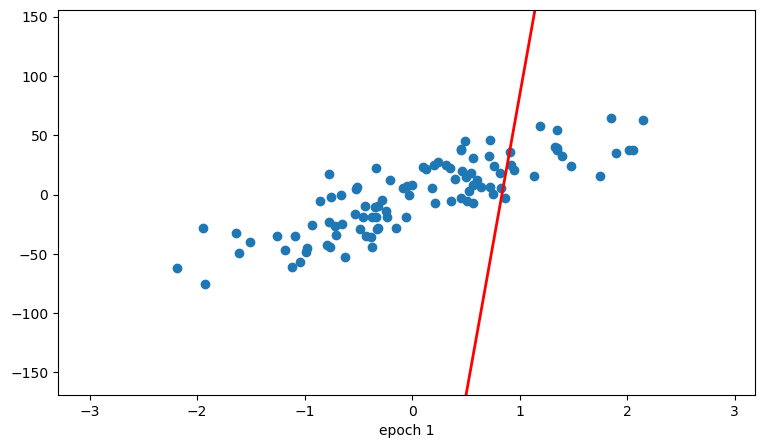

In [7]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

#f = r"animation4.gif" 
#writergif = animation.PillowWriter(fps=2) 
#anim.save(f, writer=writergif)

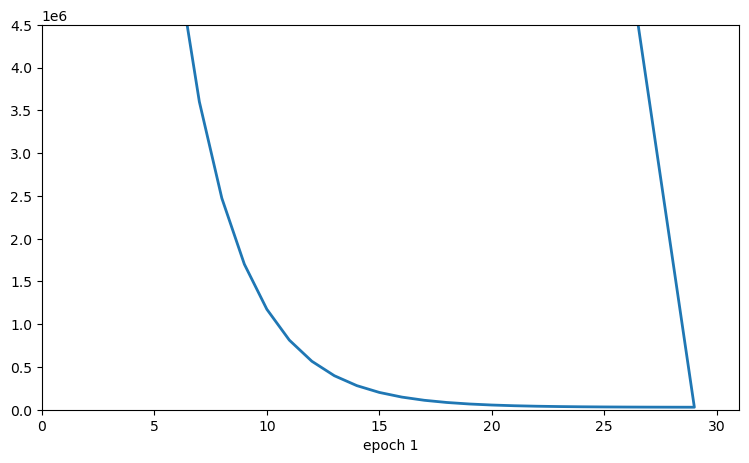

In [8]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

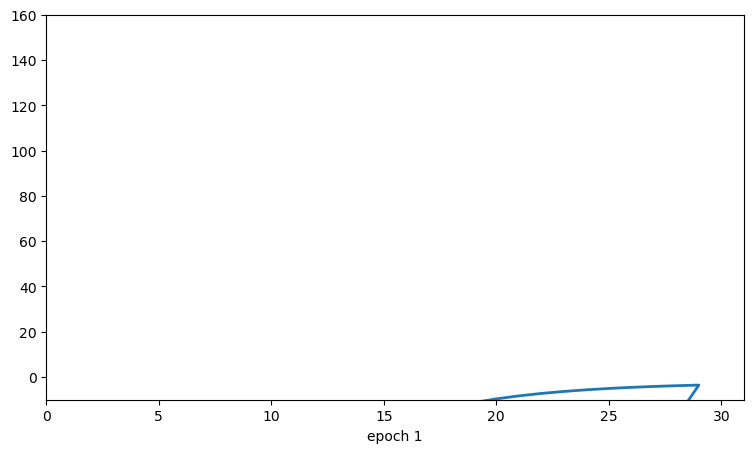

In [9]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-10, 160)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation6.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

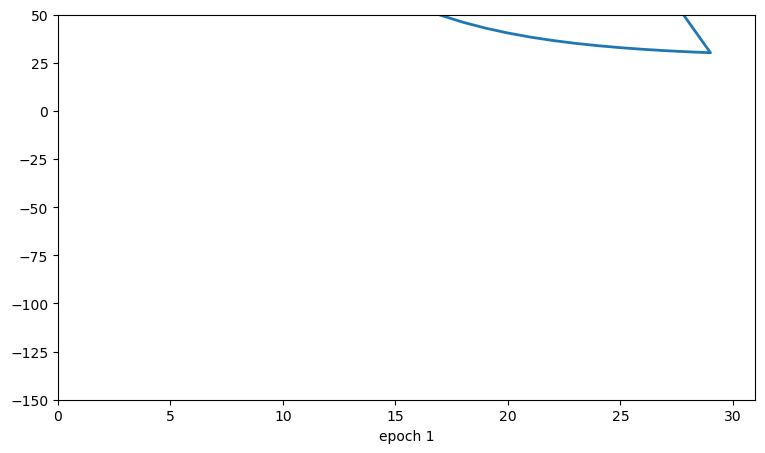

In [10]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 50)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_m[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)